In [1]:
# Chargement des packages
#pip install wordcloud
#!pip install tweepy
#!pip install textblob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import plotly.graph_objects as go

# Description des données

In [2]:
# Importation de la base de données


df=pd.read_csv("vaccination_tweets.csv")
df

id             user_name              user_location  \
0      1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1      1338158543359250433           Albert Fong          San Francisco, CA   
2      1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3      1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4      1337854064604966912  Citizen News Channel                        NaN   
...                    ...                   ...                        ...   
11015  1460932683630977025                theSun              Petaling Jaya   
11016  1460809350792896516                 Sujan                        NaN   
11017  1460581918295031809                theSun              Petaling Jaya   
11018  1460344277951782922      Aleksejs Jackovs                    Ireland   
11019  1460208097956225028                theSun              Petaling Jaya   

                                        user_description         user_created  \
0      Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1      Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                         heil, hydra 🖐☺  2020-06-25 23:30:28   
3      Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4      Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
...                                                  ...                  ...   
11015  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   
11016  ________________________ •Napricorn• •It's jus...  2013-01-28 11:48:20   
11017  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   
11018  #Scientificresearcher in #InformationTechnolog...  2012-08-13 13:47:03   
11019  Breaking news updates from the website of Mala...  2009-07-29 01:58:44   

       user_followers  user_friends  user_favourites  user_verified  \
0                 405          1692             3247          False   
1                 834           666              178          False   
2                  10            88              155          False   
3               49165          3933            21853           True   
4                 152           580             1473          False   
...               ...           ...              ...            ...   
11015          151937           465              593          False   
11016            4259           622           156941          False   
11017          151937           465              593          False   
11018               1            38               99          False   
11019          151937           465              593          False   

                      date                                               text  \
0      2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1      2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2      2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3      2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4      2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
...                    ...                                                ...   
11015  2021-11-17 11:27:49  The number of Covid-19 cases today, 17 Novembe...   
11016  2021-11-17 03:17:44                      First dose ✅\n#PfizerBioNTech   
11017  2021-11-16 12:14:00  The number of Covid-19 cases today, 16 Novembe...   
11018  2021-11-15 20:29:42  #PfizerBioNTech has developed new pill #Paxlov...   
11019  2021-11-15 11:28:34  The number of Covid-19 cases today, 15 Novembe...   

                                                hashtags               source  \
0                                     ['PfizerBioNTech']  Twitter for Android   
1                                                    NaN      Twitter Web App   
2      ['coronavirus', 'SputnikV'

In [3]:
# Informations sur la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [5]:
df = df[['text','date']]
df

text                 date
0      Same folks said daikon paste could treat a cyt...  2020-12-20 06:06:44
1      While the world has been on the wrong side of ...  2020-12-13 16:27:13
2      #coronavirus #SputnikV #AstraZeneca #PfizerBio...  2020-12-12 20:33:45
3      Facts are immutable, Senator, even when you're...  2020-12-12 20:23:59
4      Explain to me again why we need a vaccine @Bor...  2020-12-12 20:17:19
...                                                  ...                  ...
11015  The number of Covid-19 cases today, 17 Novembe...  2021-11-17 11:27:49
11016                      First dose ✅\n#PfizerBioNTech  2021-11-17 03:17:44
11017  The number of Covid-19 cases today, 16 Novembe...  2021-11-16 12:14:00
11018  #PfizerBioNTech has developed new pill #Paxlov...  2021-11-15 20:29:42
11019  The number of Covid-19 cases today, 15 Novembe...  2021-11-15 11:28:34

[11020 rows x 2 columns]

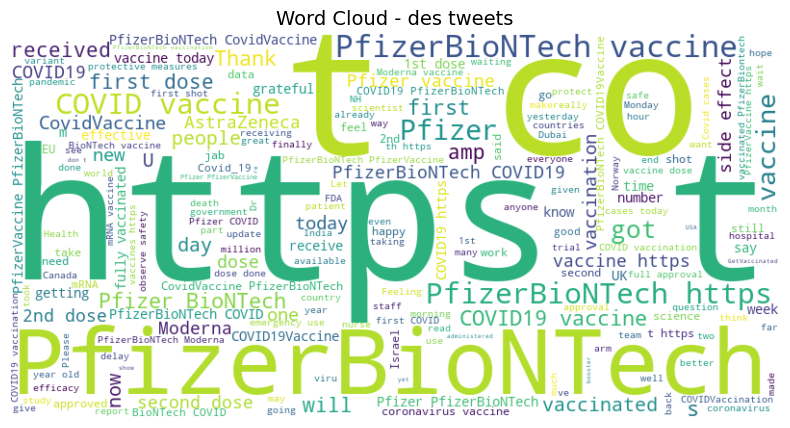

In [6]:

# Fonction pour générer le word cloud
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud 
generer_wordcloud(df['text'], 'Word Cloud - des tweets')


# Prétraitement des tweets




Supposons que nous ayons la phrase suivante :

> "Les chiens courent dans le parc."

Lorsque nous appliquons la lemmatisation à cette phrase, nous obtenons :

> "Le chien courir dans le parc."

La lemmatisation a ramené les mots à leur forme de base (lemme), en transformant "chiens" en "chien" et "courent" en "courir". Cette normalisation permet de regrouper les variantes d'un mot autour d'une seule forme canonique.

La lemmatisation est un processus essentiel dans le traitement automatique du langage naturel (TALN), car elle améliore la précision des analyses textuelles, des recherches d'informations et des tâches de classification.

Utiliser la lemmatisation aide à réduire la complexité des données textuelles en transformant les mots en leur forme canonique, ce qui facilite la comparaison, la recherche et l'analyse du texte de manière plus précise.



In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    processed_tweet = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    processed_tweet = processed_tweet.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(processed_tweet)
    
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatisation des tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text
# La Lemmatisation


# Appliquer le nettoyage du texte sur la colonne 'texte'
df['texte_nettoye'] = df['text'].apply(clean_text)

df


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natachanjongwayepnga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/natachanjongwayepnga/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natachanjongwayepnga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natachanjongwayepnga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/3583112072.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['texte_netto

text                 date  \
0      Same folks said daikon paste could treat a cyt...  2020-12-20 06:06:44   
1      While the world has been on the wrong side of ...  2020-12-13 16:27:13   
2      #coronavirus #SputnikV #AstraZeneca #PfizerBio...  2020-12-12 20:33:45   
3      Facts are immutable, Senator, even when you're...  2020-12-12 20:23:59   
4      Explain to me again why we need a vaccine @Bor...  2020-12-12 20:17:19   
...                                                  ...                  ...   
11015  The number of Covid-19 cases today, 17 Novembe...  2021-11-17 11:27:49   
11016                      First dose ✅\n#PfizerBioNTech  2021-11-17 03:17:44   
11017  The number of Covid-19 cases today, 16 Novembe...  2021-11-16 12:14:00   
11018  #PfizerBioNTech has developed new pill #Paxlov...  2021-11-15 20:29:42   
11019  The number of Covid-19 cases today, 15 Novembe...  2021-11-15 11:28:34   

                                           texte_nettoye  
0      folk said daikon paste could treat cytokine st...  
1      world wrong side history year hopefully bigges...  
2      coronavirus sputnikv astrazeneca pfizerbiontec...  
3      fact immutable senator even youre ethically st...  
4      explain need vaccine borisjohnson matthancock ...  
...                                                  ...  
11015  number covid19 case today 17 november 2021 rem...  
11016                          first dose pfizerbiontech  
11017  number covid19 case today 16 november 2021 rem...  
11018  pfizerbiontech developed new pill paxlovid inc...  
11019  number covid19 case today 15 november 2021 rem...  

[11020 rows x 3 columns]

In [8]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

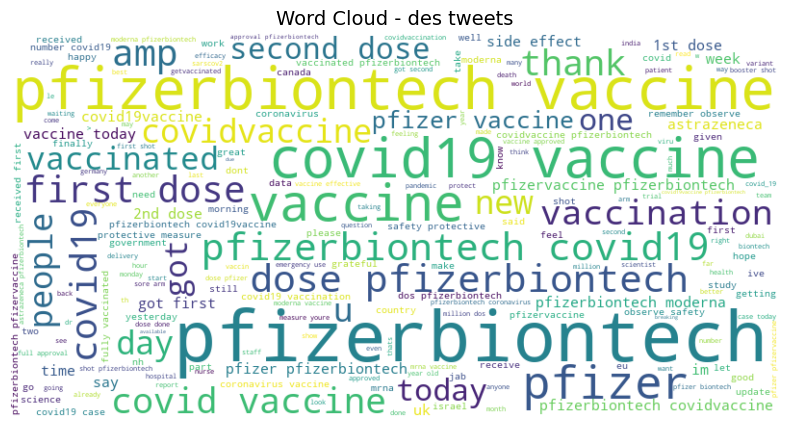

In [9]:

# Générer le word cloud 
generer_wordcloud(df['texte_nettoye'], 'Word Cloud - des tweets')


# Analyse des sentiments

In [13]:
example1=TextBlob("Je suis contente d'avoir réalisé le challenge #100JoursDeML")
print(example1.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [11]:
example2=TextBlob("This situation makes me sad and frustrated.")
print(example2.sentiment)

Sentiment(polarity=-0.6, subjectivity=0.6)


In [12]:
example3=TextBlob("Tomorrow is the end of the challenge.")
print(example3.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [14]:
from flair.models import TextClassifier
from flair.data import Sentence

texte = "Je suis contente d'avoir réalisé le challenge #100JoursDeML"

classifier = TextClassifier.load("sentiment")
sentence = Sentence(texte)

classifier.predict(sentence)

polarite = sentence.labels[0].score
label = sentence.labels[0].value

print("Polarité du sentiment :", polarite)
print("Étiquette du sentiment :", label)

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Polarité du sentiment : 0.9991108775138855
Étiquette du sentiment : POSITIVE


In [15]:
# Calcule de la polarité
df['polarity'] = df['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment[1])
# Définir les étiquettes de sentiment en fonction de la polarité
df['Sentiment'] = df['polarity'].apply(lambda x: 'Positif' if x > 0 else ('Négatif' if x < 0 else 'Neutre'))
df

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/660074019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = df['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment[0])
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/660074019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = df['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment[1])
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/660074019.py:5: SettingWithCopy

text                 date  \
0      Same folks said daikon paste could treat a cyt...  2020-12-20 06:06:44   
1      While the world has been on the wrong side of ...  2020-12-13 16:27:13   
2      #coronavirus #SputnikV #AstraZeneca #PfizerBio...  2020-12-12 20:33:45   
3      Facts are immutable, Senator, even when you're...  2020-12-12 20:23:59   
4      Explain to me again why we need a vaccine @Bor...  2020-12-12 20:17:19   
...                                                  ...                  ...   
11015  The number of Covid-19 cases today, 17 Novembe...  2021-11-17 11:27:49   
11016                      First dose ✅\n#PfizerBioNTech  2021-11-17 03:17:44   
11017  The number of Covid-19 cases today, 16 Novembe...  2021-11-16 12:14:00   
11018  #PfizerBioNTech has developed new pill #Paxlov...  2021-11-15 20:29:42   
11019  The number of Covid-19 cases today, 15 Novembe...  2021-11-15 11:28:34   

                                           texte_nettoye  polarity  \
0      folk said daikon paste could treat cytokine st...  0.000000   
1      world wrong side history year hopefully bigges... -0.500000   
2      coronavirus sputnikv astrazeneca pfizerbiontec...  0.000000   
3      fact immutable senator even youre ethically st...  0.100000   
4      explain need vaccine borisjohnson matthancock ...  0.000000   
...                                                  ...       ...   
11015  number covid19 case today 17 november 2021 rem...  0.000000   
11016                          first dose pfizerbiontech  0.250000   
11017  number covid19 case today 16 november 2021 rem...  0.000000   
11018  pfizerbiontech developed new pill paxlovid inc... -0.121212   
11019  number covid19 case today 15 november 2021 rem...  0.000000   

       subjectivity Sentiment  
0          0.000000    Neutre  
1          0.900000   Négatif  
2          0.033333    Neutre  
3          0.550000   Positif  
4          0.000000    Neutre  
...             ...       ...  
11015      0.000000    Neutre  
11016      0.333333   Positif  
11017      0.000000    Neutre  
11018      0.501515   Négatif  
11019      0.000000    Neutre  

[11020 rows x 6 columns]

In [16]:
# Calculer les statistiques sur la polarité
df['polarity'].describe()

count    11020.000000
mean         0.101887
std          0.233175
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.216667
max          1.000000
Name: polarity, dtype: float64

In [17]:
# Calculer les statistiques sur la subjectivité
df['subjectivity'].describe()

count    11020.000000
mean         0.275876
std          0.304142
min          0.000000
25%          0.000000
50%          0.200000
75%          0.500000
max          1.000000
Name: subjectivity, dtype: float64

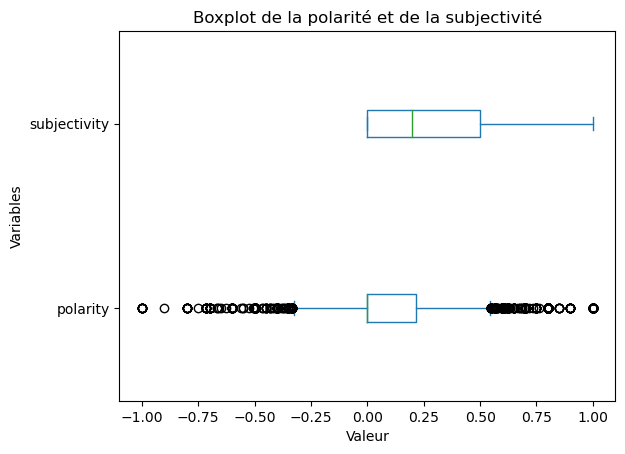

In [18]:
# Tracer le boxplot pour la polarité et la subjectivité
df[['polarity', 'subjectivity']].plot(kind='box', vert=False)

# Ajouter des titres et des étiquettes d'axe
plt.title('Boxplot de la polarité et de la subjectivité')
plt.xlabel('Valeur')
plt.ylabel('Variables')

# Afficher le boxplot
plt.show()

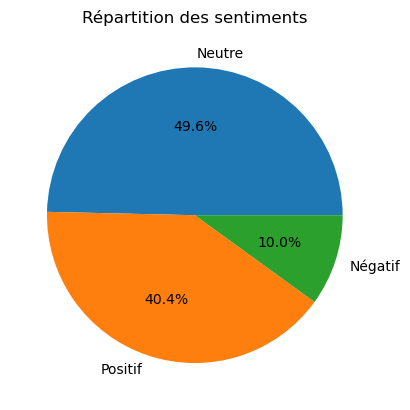

In [19]:
# Compter le nombre de chaque sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Obtenir les étiquettes de sentiment et les valeurs correspondantes
labels = sentiment_counts.index.tolist()
values = sentiment_counts.values.tolist()

# Tracer le diagramme circulaire
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Ajouter un titre
plt.title("Répartition des sentiments")

# Afficher le diagramme circulaire
plt.show()

In [20]:
import plotly.express as px
fig = px.scatter(df,x='polarity',y='subjectivity')
fig.show()

In [21]:
# Convertir la colonne 'Date' en type de données 'datetime'
df['date'] = pd.to_datetime(df['date'])

# Trier le DataFrame par ordre croissant de dates
df = df.sort_values('date')

# Créer la figure
fig = go.Figure()

# Ajouter la trace de ligne pour l'évolution de la polarité dans le temps
fig.add_trace(go.Scatter(x=df['date'], y=df['polarity'], mode='lines', name='Polarité'))

# Mettre en forme le titre et les étiquettes d'axe
fig.update_layout(title='Évolution de la polarité dans le temps',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Polarité'))

# Afficher le graphique
fig.show()

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/481517683.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
import plotly.express as px
# Convertir la colonne 'date' en type datetime
df['date'] = pd.to_datetime(df['date'])

# Enlever les heures de la date
df['date'] = df['date'].dt.date
# Calculer le nombre de tweets par sentiment et par date
df_agg = df.groupby(['date', 'Sentiment']).size().reset_index(name='counts')

df_agg.head()

date Sentiment  counts
0  2020-12-12    Neutre      34
1  2020-12-12   Négatif       7
2  2020-12-12   Positif      22
3  2020-12-13    Neutre      50
4  2020-12-13   Négatif      10

In [23]:
fig = px.line(df_agg, x='date', y='counts', color='Sentiment', title='Analyse de sentiment des vaccins COVID-19')

fig.show()


In [24]:

# Grouper par date et compter le nombre de sentiments positifs, négatifs et neutres
sentiment_counts = df.groupby('date')['Sentiment'].value_counts().unstack().fillna(0)

# Afficher le résultat
print(sentiment_counts)

Sentiment   Neutre  Négatif  Positif
date                                
2020-12-12    34.0      7.0     22.0
2020-12-13    50.0     10.0     38.0
2020-12-14    61.0     10.0     66.0
2020-12-15    72.0     15.0     63.0
2020-12-16    64.0     20.0     60.0
...            ...      ...      ...
2021-11-19     2.0      0.0      5.0
2021-11-20     8.0      0.0      4.0
2021-11-21     4.0      0.0      1.0
2021-11-22     3.0      0.0      2.0
2021-11-23     8.0      1.0      1.0

[282 rows x 3 columns]


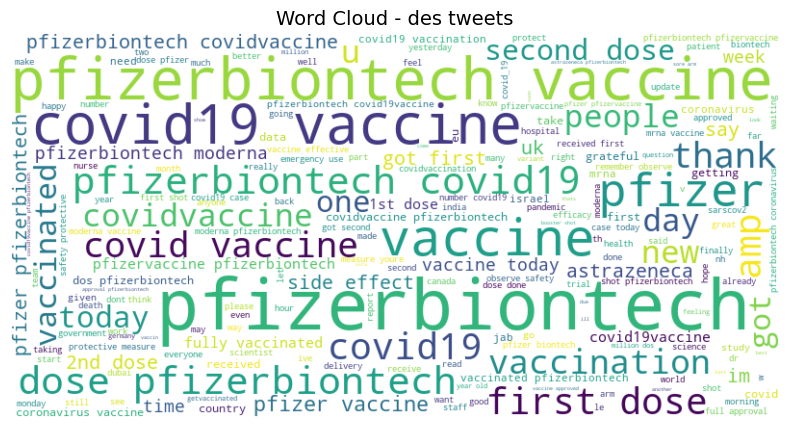

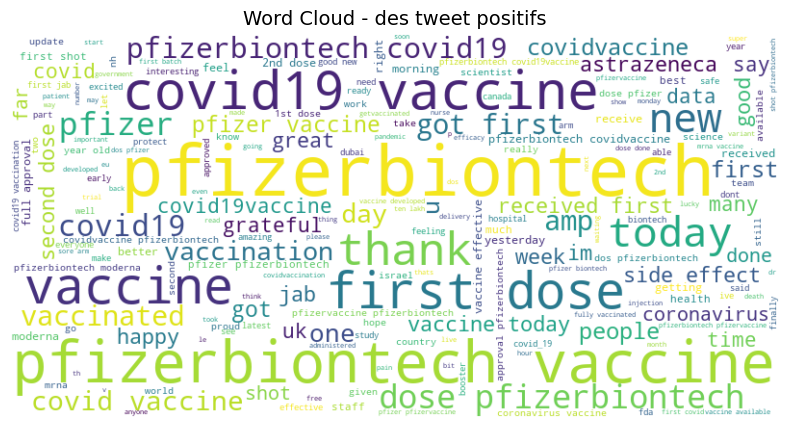

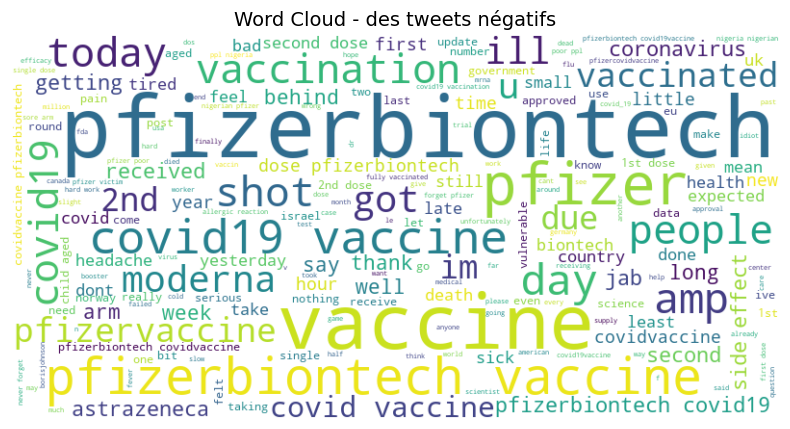

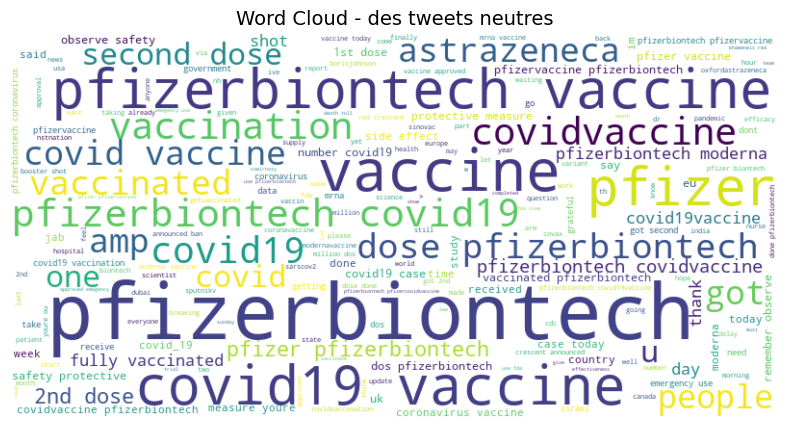

In [25]:
# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df['texte_nettoye'], 'Word Cloud - des tweets')
# Filtrer les tweets positifs
tweets_positifs = df[df['polarity']>0]['texte_nettoye']
generer_wordcloud(tweets_positifs, 'Word Cloud - des tweet positifs')
# Filtrer les tweets positifs
tweets_negatifs = df[df['polarity'] < 0]['texte_nettoye']
generer_wordcloud(tweets_negatifs, 'Word Cloud - des tweets négatifs')
# Filtrer les tweets positifs
tweets_neutre = df[df['polarity'] ==0]['texte_nettoye']
generer_wordcloud(tweets_neutre, 'Word Cloud - des tweets neutres')

In [26]:
# Breaking down the tweets into words in seperate categories
positive_tokens = [token for line in tweets_positifs for token in line.split()]
negative_tokens = [token for line in tweets_negatifs for token in line.split()]
neutral_tokens = [token for line in tweets_neutre for token in line.split()]

In [27]:
from collections import Counter
# pour obtenir les mots les plus utilisés
def get_maxtoken(tweets, num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)

def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
  fig = px.bar(df,x='words',y='count',title = title)
  fig.show()

In [28]:
token_df_vis(positive_tokens,'Positive')
token_df_vis(negative_tokens,'Negative')
token_df_vis(neutral_tokens,'Neutral')

# Analyse par type de vaccin

In [30]:
#Création des tags de référence pour 5 vaccins -> Pfizer, Covaxin (Bharat Biotech), Sputnik, AstraZenca (Covishield), Moderna.
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']


In [32]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

df['pfizer'] = df['texte_nettoye'].apply(lambda x : refer(x, pfizer_refs))
df['bbiotech'] = df['texte_nettoye'].apply(lambda x : refer(x, bbiotech_refs))
df['sputnik'] = df['texte_nettoye'].apply(lambda x : refer(x, sputnik_refs))
df['astra'] = df['texte_nettoye'].apply(lambda x : refer(x, astra_refs))
df['moderna'] = df['texte_nettoye'].apply(lambda x : refer(x, moderna_refs))
df

text        date  \
44     #FDA authorizes #PfizerBioNTech #coronavirus v...  2020-12-12   
43     Trump announces #vaccine rollout 'in less than...  2020-12-12   
42     #CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...  2020-12-12   
41     FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...  2020-12-12   
40     @mirekR9 @sputnikvaccine @AstraZeneca it's the...  2020-12-12   
...                                                  ...         ...   
10963  The expansion is valid for both Moderna and Pf...  2021-11-23   
10962  #Moderna and #PfizerBioNTech \n\nFull report: ...  2021-11-23   
10961  Nothing to see here 👀\n\n#Health #heartattack ...  2021-11-23   
10960  #PfizerBiontech #CovidVaccines  the effects #M...  2021-11-23   
10959  #PfizerBiontech #vaccination #pfizer #Covid_19...  2021-11-23   

                                           texte_nettoye  polarity  \
44     fda authorizes pfizerbiontech coronavirus vacc...     0.000   
43     trump announces vaccine rollout le 24 hour fir...     0.125   
42     covidvaccine pfizerbiontech covid19 pfizerbion...     0.000   
41     fact sheet recipient caregiver pfizerbiontech ...     0.000   
40     mirekr9 sputnikvaccine astrazeneca one doesnt ...     0.000   
...                                                  ...       ...   
10963  expansion valid moderna pfizerbiontech covid19...     0.000   
10962  moderna pfizerbiontech full report httpstcog6c...     0.350   
10961  nothing see health heartattack myocarditis per...     0.000   
10960  pfizerbiontech covidvaccines effect msm hiding...     0.000   
10959  pfizerbiontech vaccination pfizer covid_19 ive...     0.000   

       subjectivity Sentiment  pfizer  bbiotech  sputnik  astra  moderna  
44         0.000000    Neutre       1         0        0      0        0  
43         0.166667   Positif       0         0        0      0        0  
42         0.000000    Neutre       1         0        0      0        0  
41         0.000000    Neutre       1         0        0      0        0  
40         0.000000    Neutre       1         0        1      1        0  
...             ...       ...     ...       ...      ...    ...      ...  
10963      0.400000    Neutre       1         0        0      0        1  
10962      0.550000   Positif       1         0        0      0        1  
10961      0.000000    Neutre       1         0        0      0        1  
10960      0.000000    Neutre       1         0        0      0        0  
10959      0.000000    Neutre       1         0        0      0        0  

[11020 rows x 11 columns]

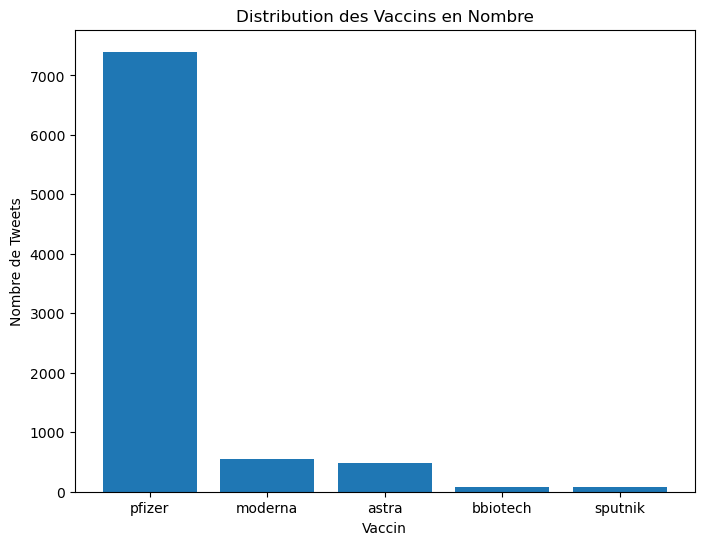

In [33]:
# Liste des noms de vaccins
vaccine_names = ['pfizer', 'moderna', 'astra', 'bbiotech', 'sputnik']

# Calculer la distribution de chaque vaccin en nombre
vaccine_counts = df[vaccine_names].sum()

# Créer un graphique à barres pour la distribution de chaque vaccin
plt.figure(figsize=(8, 6))
plt.bar(vaccine_names, vaccine_counts)
plt.title('Distribution des Vaccins en Nombre')
plt.xlabel('Vaccin')
plt.ylabel('Nombre de Tweets')
plt.show()

In [34]:
# Initialiser un DataFrame vide pour les résultats
results_df = pd.DataFrame(columns=['Vaccin', 'Moyenne Polarity', 'Max Polarity', 'Min Polarity', 'Médiane Polarity',
                                   'Moyenne Subjectivity', 'Max Subjectivity', 'Min Subjectivity', 'Médiane Subjectivity'])
# Liste des noms de vaccins
vaccine_names = ['pfizer', 'moderna', 'astra', 'bbiotech', 'sputnik']

# Parcourir les vaccins
for vaccine in vaccine_names:
    # Filtrer le DataFrame pour le vaccin spécifique
    filtered_df = df[df[vaccine] == 1]
    
    # Calculer les statistiques pour la polarité et la subjectivité
    polarity_stats = filtered_df['polarity'].agg(['mean', 'max', 'min', 'median'])
    subjectivity_stats = filtered_df['subjectivity'].agg(['mean', 'max', 'min', 'median'])
    
    # Ajouter les résultats au DataFrame des résultats
    results_df = results_df.append({'Vaccin': vaccine,
                                    'Moyenne Polarity': polarity_stats['mean'],
                                    'Max Polarity': polarity_stats['max'],
                                    'Min Polarity': polarity_stats['min'],
                                    'Médiane Polarity': polarity_stats['median'],
                                    'Moyenne Subjectivity': subjectivity_stats['mean'],
                                    'Max Subjectivity': subjectivity_stats['max'],
                                    'Min Subjectivity': subjectivity_stats['min'],
                                    'Médiane Subjectivity': subjectivity_stats['median']}, ignore_index=True)

# Afficher le DataFrame des résultats
results_df

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/2203543955.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/2203543955.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/2203543955.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/2203543955.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/2203543955.py:17: FutureWarning:

The frame.append method is de

Vaccin  Moyenne Polarity  Max Polarity  Min Polarity  Médiane Polarity  \
0    pfizer          0.100721           1.0     -1.000000               0.0   
1   moderna          0.095397           1.0     -0.714286               0.0   
2     astra          0.093285           1.0     -0.700000               0.0   
3  bbiotech          0.059863           0.8     -0.500000               0.0   
4   sputnik          0.011118           1.0     -0.700000               0.0   

   Moyenne Subjectivity  Max Subjectivity  Min Subjectivity  \
0              0.254033               1.0               0.0   
1              0.252461               1.0               0.0   
2              0.257784               1.0               0.0   
3              0.221396               1.0               0.0   
4              0.150123               0.9               0.0   

   Médiane Subjectivity  
0              0.111111  
1              0.000000  
2              0.100000  
3              0.000000  
4              0.000000

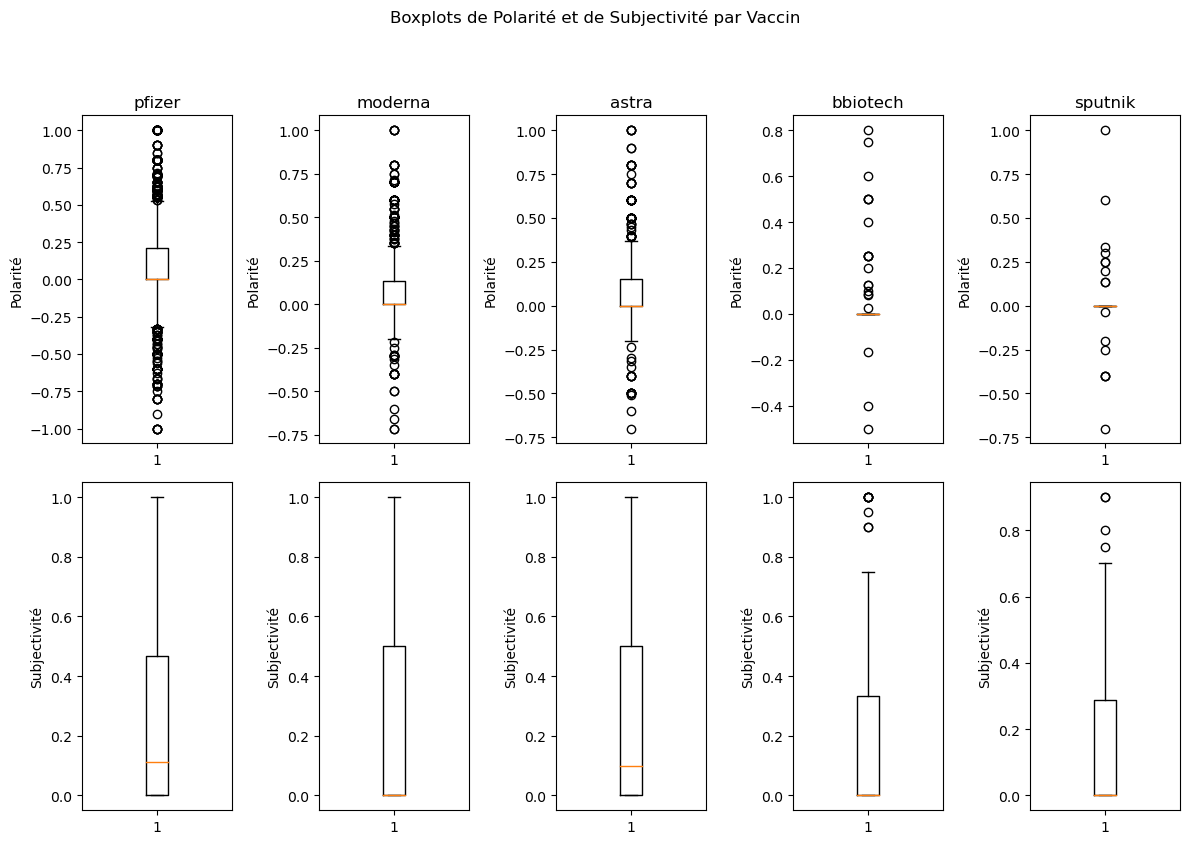

In [35]:
# Création des boxplots pour la polarité et la subjectivité pour chaque vaccin
fig, axes = plt.subplots(nrows=2, ncols=len(vaccine_names), figsize=(12, 8))

for i, vaccine in enumerate(vaccine_names):
    # Boxplot de la polarité pour le vaccin spécifique
    axes[0, i].boxplot(df[df[vaccine] == 1]['polarity'])
    axes[0, i].set_title(vaccine)
    axes[0, i].set_ylabel('Polarité')
    
    # Boxplot de la subjectivité pour le vaccin spécifique
    axes[1, i].boxplot(df[df[vaccine] == 1]['subjectivity'])
    axes[1, i].set_ylabel('Subjectivité')

# Ajouter des titres et ajuster les espacements
fig.suptitle('Boxplots de Polarité et de Subjectivité par Vaccin', y=1.05)
plt.tight_layout()

# Afficher les boxplots
plt.show()

In [36]:
# Liste des noms de vaccins
vaccine_names = ['pfizer', 'bbiotech', 'sputnik', 'astra', 'moderna']

# Créer des graphiques séparés pour l'évolution de la moyenne mobile de la polarité par date pour chaque vaccin
for vaccine in vaccine_names:
    fig = px.line(df[df[vaccine] == 1], x='date', y='polarity', 
                  title=f'Évolution de la Moyenne Mobile de la Polarité ({vaccine.capitalize()})')
    fig.show()

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Liste des noms de vaccins
vaccine_names = ['pfizer', 'bbiotech', 'sputnik', 'astra', 'moderna']

# Créer un graphique séparé pour chaque vaccin
for vaccine in vaccine_names:
    filtered_df = df[df[vaccine] == 1]  # Filtrer les données pour le vaccin spécifique
    filtered_df['rolling_mean'] = filtered_df['polarity'].rolling(window=3, min_periods=1).mean()  # Calculer la moyenne mobile

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_df['date'], y=filtered_df['rolling_mean'], name=vaccine.capitalize()))

    fig.update_layout(title=f'Évolution de la Moyenne Mobile de la Polarité ({vaccine.capitalize()})',
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='Moyenne Mobile de la Polarité'))

    fig.show()

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/4011864772.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/4011864772.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/4011864772.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/4011864772.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_40489/4011864772.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

